In [ ]:
# GPU setup
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from transformers import NougatProcessor, VisionEncoderDecoderModel
processor = NougatProcessor.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\NOUGAT_MathOCR\checkpoint-2200")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
model = VisionEncoderDecoderModel.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\NOUGAT_MathOCR\checkpoint-2200")
model.to(device)

# Dataset

In [ ]:
from datasets import load_from_disk

dataset = load_from_disk(r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex4\Processed_Dataset")
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 700
    })
    valid: Dataset({
        features: ['image', 'text'],
        num_rows: 154
    })
})

Random sample from 'train' is 546
Ground Truth is {'latex_0': 'k _ { 1 } \\approx \\pm \\alpha k _ { 2 }', 'latex_1': 'L = L _ { + } \\oplus L _ { - }', 'latex_2': 'd _ { 2 } = 2 p , d _ { 3 } = 3 q + 1 ,', 'latex_3': 'e _ { a } = \\lparen 1 / 2 \\rparen w _ { a } ,', 'latex_4': 'N = 4 \\sum _ { a } n _ { a } .', 'latex_5': 'G _ { \\mu \\nu } = \\eta _ { \\mu \\nu } .', 'latex_6': 'R - \\Lambda = 8 \\pi G T', 'latex_7': 'P _ { X } = a ^ { \\Lambda } P _ { \\Lambda }', 'latex_8': '\\int \\mathrm { d } g \\lbrace F , G \\rbrace = 0 ,', 'latex_9': 'k = \\sqrt { - a ^ { n } a _ { n } }'}


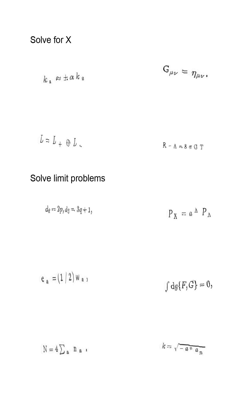

In [ ]:
import random
random_sample_train = random.randint(0, len(dataset['train']) - 1)
print(f"Random sample from 'train' is {random_sample_train}")
print(f"Ground Truth is {dataset['train'][random_sample_train]['text']}")
dataset['train'][random_sample_train]['image'].resize((250, 400))

In [ ]:
def json2token(data):
    # Initialize an empty string to build the formatted output
    formatted_output = ''

    # Loop through each key-value pair in the dictionary
    for key, value in data.items():
        # Remove commas and format each pair without single quotes
        value = str(value).replace(',', '')  # Remove commas
        value = str(value).replace('.', '')
        formatted_output += f"<s_{key}>{value}</s_{key}>"

    # Return the final formatted output string
    return formatted_output.strip()  # Remove trailing whitespace


# # Example dictionary input
# A = {
#     'latex1': '\\lbrace \\dot { X } ^ { \\mu } , X _ { \\mu } \\rbrace = 0 .',
#     'latex2': 'J ^ { \\mu \\nu } = L ^ { \\mu \\nu } + S ^ { \\mu \\nu } ,',
#     'latex3': 'e ^ { - C } = H _ { 1 } , e ^ { - \\chi } = H _ { 2 } .',
#     'latex4': 'N _ { \\mu \\nu } \\equiv G _ { \\mu \\nu } - B _ { \\mu \\nu } ,',
#     'latex5': 'I ^ { \\omega } = \\bigcup I ^ { \\omega } \\lparen O \\rparen .',
#     'latex6': '\\partial _ { \\mu } h _ { \\nu } + \\partial _ { \\nu }',
#     'latex7': '\\mu _ { p } = N \\sqrt { 1 6 \\pi G _ { D } } \\tau _ { p } .',
#     'latex8': '\\nu = l \\sinh \\rho , \\sigma = l \\cosh \\rho .'
# }

# # Convert the dictionary to the desired format
# output = json2token(A)
# print(output)


In [ ]:

special_tokens = ['<s_latex0>', '</s_latex0>', '<s_latex1>', '</s_latex1>', '<s_latex2>', '</s_latex2>', '<s_latex3>', '</s_latex3>', '<s_latex4>', '</s_latex4>', '<s_latex5>', '</s_latex5>', '<s_latex6>', '</s_latex6>', '<s_latex7>', '</s_latex7>', '<s_latex8>', '</s_latex8>', '<s_latex9>', '</s_latex9>' ]

In [ ]:
import json

task_start_token = '<s>'
eos_token = '</s>'

def process_documents(sample):

  GT_string_single_quote = sample["text"]
  GT_string_single_quote = str(GT_string_single_quote)
  #print(type(sample["text"]))

  GT_string_double_quote = GT_string_single_quote.replace("'", '"')
  text = json.loads(GT_string_double_quote)
  d_doc = task_start_token + json2token(text) + eos_token
  print('d_doc', d_doc)
  image = sample["image"].convert('RGB')
  return {"image": image, "text": d_doc}

In [ ]:
valid_dataset = dataset['valid']
proc_valid_dataset = valid_dataset.map(process_documents)

In [ ]:
train_dataset = dataset['train']
proc_train_dataset = train_dataset.map(process_documents)

In [ ]:
len(proc_train_dataset), len(proc_valid_dataset)

(700, 154)

In [ ]:
proc_train_dataset['text'][322]

'<s><s_latex_0>S = \\frac { A } { 4 G \\hbar } </s_latex_0><s_latex_1>D _ { \\mu } \\hat { F } ^ { a \\mu \\nu } = 0</s_latex_1><s_latex_2>\\sum _ { i = 1 } ^ { n } \\sigma _ { i } = 0 </s_latex_2><s_latex_3>D _ { - } = i \\bar { \\partial }</s_latex_3><s_latex_4>D ^ { \\dagger } D = H + V</s_latex_4><s_latex_5>S = \\int d ^ { 2 } x L ^ { \\mathrm { a b t m } }</s_latex_5><s_latex_6>L = - \\frac { T } { 2 } \\eta _ { \\mu \\nu }</s_latex_6><s_latex_7>None</s_latex_7><s_latex_8>None</s_latex_8><s_latex_9>None</s_latex_9></s>'

In [ ]:
proc_valid_dataset['text'][64]

'<s><s_latex_0>S _ { \\eta F } = \\int \\lt \\eta  F \\gt </s_latex_0><s_latex_1>m _ { _ { J } }</s_latex_1><s_latex_2>\\frac { \\partial S } { \\partial t } \\pm \\omega = 0</s_latex_2><s_latex_3>\\Xi ^ { \\dagger } H \\Xi = \\bar { H } </s_latex_3><s_latex_4>W = W _ { o } + W _ { A B } A B </s_latex_4><s_latex_5>g = k \\cdot a \\cdot n \\in K \\cdot A \\cdot N </s_latex_5><s_latex_6>\\lambda = 8 + 2 t  t \\in N _ { 0 } </s_latex_6><s_latex_7>- C ^ { T } = C = \\beta C \\beta C ^ { 2 } = - 1</s_latex_7><s_latex_8>None</s_latex_8><s_latex_9>None</s_latex_9></s>'

# processor and model token setup

In [ ]:
from transformers import VisionEncoderDecoderConfig

image_size = [720, 960]
max_length = 512

# update image_size of the encoder
# during pre-training, a larger image size was used
config = model.config
#config = VisionEncoderDecoderConfig.from_pretrained(r"E:\Abdul_Muqtadir\NRPU_HMP_Project\Weights\DONUT\Processor1")
config.encoder.image_size = image_size # (height, width)
# update max_length of the decoder (for generation)
config.decoder.max_length = max_length

In [ ]:
processor.tokenizer.add_special_tokens({"additional_special_tokens": special_tokens + [task_start_token] + [eos_token]})

4

In [ ]:
model.decoder.resize_token_embeddings(len(processor.tokenizer))

Embedding(50020, 1024)

In [ ]:
# Print standard special tokens
print("Special Tokens:")
print("Start token:", processor.tokenizer.cls_token)
print("End token:", processor.tokenizer.sep_token)
print("Padding token:", processor.tokenizer.pad_token)
print("Unknown token:", processor.tokenizer.unk_token)
print("Mask token:", processor.tokenizer.mask_token)

# Print any additional tokens that have been added, like custom tags
print("\nAdditional Special Tokens:")
for token, idx in processor.tokenizer.get_vocab().items():
    if token.startswith("<s") or token.startswith("</s"):
        print(f"{token}: {idx}")


Special Tokens:
Start token: None
End token: None
Padding token: <pad>
Unknown token: <unk>
Mask token: None

Additional Special Tokens:
</s_latex4>: 50006
<s_latex6>: 50008
<s_latex8>: 50003
</s_latex6>: 50011
</s_latex2>: 50009
</s_latex3>: 50007
<s_latex2>: 50002
<s_latex4>: 50001
<s>: 0
</s_latex1>: 50000
</s_latex8>: 50004
</s_latex9>: 50019
</s_latex0>: 50018
<s_latex3>: 50012
<s_latex5>: 50005
</s_latex7>: 50013
<s_latex9>: 50017
<s_latex0>: 50016
</s_latex5>: 50015
<s_latex1>: 50010
<s_latex7>: 50014
</s>: 2


In [ ]:
config.decoder_start_token_id = processor.tokenizer.convert_tokens_to_ids(['<s>'])[0]

In [ ]:
# Set tokens in the model's configuration
model.config.bos_token_id = processor.tokenizer.cls_token_id  # Start token
model.config.eos_token_id = processor.tokenizer.sep_token_id  # End token
model.config.pad_token_id = processor.tokenizer.pad_token_id  # Padding token

print("Start token ID:", model.config.bos_token_id)
print("End token ID:", model.config.eos_token_id)
print("Padding token ID:", model.config.pad_token_id)


Start token ID: None
End token ID: None
Padding token ID: 1


In [ ]:
# Checking the added special tokens
added_special_tokens_for_processor_1 = processor.tokenizer.get_added_vocab()
print("Added special tokens and their IDs:", added_special_tokens_for_processor_1)
print("Number of added special tokens:", len(added_special_tokens_for_processor_1))

Added special tokens and their IDs: {'<s>': 0, '<pad>': 1, '</s>': 2, '<unk>': 3, '[START_REF]': 4, '[END_REF]': 5, '[IMAGE]': 6, '<fragments>': 7, '</fragments>': 8, '<work>': 9, '</work>': 10, '[START_SUP]': 11, '[END_SUP]': 12, '[START_SUB]': 13, '[END_SUB]': 14, '[START_DNA]': 15, '[END_DNA]': 16, '[START_AMINO]': 17, '[END_AMINO]': 18, '[START_SMILES]': 19, '[END_SMILES]': 20, '[START_I_SMILES]': 21, '[END_I_SMILES]': 22, '</s_latex1>': 50000, '<s_latex4>': 50001, '<s_latex2>': 50002, '<s_latex8>': 50003, '</s_latex8>': 50004, '<s_latex5>': 50005, '</s_latex4>': 50006, '</s_latex3>': 50007, '<s_latex6>': 50008, '</s_latex2>': 50009, '<s_latex1>': 50010, '</s_latex6>': 50011, '<s_latex3>': 50012, '</s_latex7>': 50013, '<s_latex7>': 50014, '</s_latex5>': 50015, '<s_latex0>': 50016, '<s_latex9>': 50017, '</s_latex0>': 50018, '</s_latex9>': 50019}
Number of added special tokens: 43


In [ ]:
def transform_and_tokenize(sample, max_length=512, ignore_id=1):
    # Create tensor from image
    try:
        pixel_values = processor(
            sample["image"], return_tensors="pt"
        ).pixel_values.squeeze()
    except Exception as e:
        print(f"Error processing image: {e}")
        return {}

    # Tokenize the document
    input_ids = processor.tokenizer(
        sample["text"],
        add_special_tokens=True,  # Add special tokens like [CLS] and [SEP]
        max_length=max_length,
        padding="max_length",  # Pad to max_length
        truncation=True,  # Truncate if longer than max_length
        return_tensors="pt",
    )["input_ids"].squeeze(0)

    # Prepare labels for the model
    labels = input_ids.clone()
    labels[labels == processor.tokenizer.pad_token_id] = ignore_id  # Ignore padding tokens

    return {
        "pixel_values": pixel_values,
        "labels": labels,
        "target_sequence": sample["text"]  # Include the original text if needed
    }


In [ ]:
# Limit to the first 10 samples
small_train_dataset1 = proc_train_dataset.select(range(100))

small_processed_train_dataset1 = small_train_dataset1.map(transform_and_tokenize,remove_columns=["image","text"])

In [ ]:
# Limit to the first 10 samples
small_train_dataset2 = proc_train_dataset.select(range(300, 400))

small_processed_train_dataset2 = small_train_dataset2.map(transform_and_tokenize,remove_columns=["image","text"])

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
small_processed_train_dataset1, small_processed_train_dataset2

(Dataset({
     features: ['pixel_values', 'labels', 'target_sequence'],
     num_rows: 100
 }),
 Dataset({
     features: ['pixel_values', 'labels', 'target_sequence'],
     num_rows: 100
 }))

In [ ]:
processed_valid_dataset = proc_valid_dataset.map(transform_and_tokenize,remove_columns=["image","text"])

Map:   0%|          | 0/154 [00:00<?, ? examples/s]

In [ ]:
# Assuming proc_train_dataset is your loaded dataset and transform_and_tokenize is the function to process each sample
processed_train_dataset = proc_train_dataset.map(
    transform_and_tokenize,
    batched=True,
    batch_size=100,
    remove_columns=["image", "text"]
)


Map:   0%|          | 0/700 [00:00<?, ? examples/s]

In [ ]:
# from datasets import concatenate_datasets

# # Combine the datasets
# combined_dataset = concatenate_datasets([small_processed_train_dataset1, small_processed_train_dataset2])

# # Display the combined dataset
# print(combined_dataset)


In [ ]:
# # Limit to the first 10 samples
# small_valid_dataset = proc_valid_dataset.select(range(100))

# # Apply the transformation only on these 10 samples
# small_processed_valid_dataset = small_valid_dataset.map(transform_and_tokenize, remove_columns=["image", "text"])


In [ ]:
# small_processed_valid_dataset

In [ ]:
# small_processed_valid_dataset['target_sequence'][0]

In [ ]:
processed_train_dataset['target_sequence'][0]

'<s><s_latex_0>\\hat { H } = \\frac { g ^ { 2 } } { 2 }</s_latex_0><s_latex_1>F _ { L } ^ { 3 } = - \\frac { 1 } { g } \\omega </s_latex_1><s_latex_2>\\rho = \\sum _ { j } H _ { j } \\otimes h ^ { j } </s_latex_2><s_latex_3>q = 1 / \\sqrt { f _ { H } } </s_latex_3><s_latex_4>\\vec { x } = \\frac { \\vec { \\beta } } { \\alpha }</s_latex_4><s_latex_5>C ^ { 1 } _ { 1 \\mu } = - C ^ { 2 } _ { 2 \\mu } </s_latex_5><s_latex_6>\\varepsilon = \\varepsilon _ { \\infty }</s_latex_6><s_latex_7>None</s_latex_7><s_latex_8>None</s_latex_8><s_latex_9>None</s_latex_9></s>'

In [ ]:
# Decode the labels of the first sample in `small_processed_valid_dataset`
decoded_labels = processor.tokenizer.decode(processed_train_dataset['labels'][0], skip_special_tokens=False)
print(decoded_labels)


<s><s><s_latex_0>\hat { H } = \frac { g ^ { 2 } } { 2 }</s_latex_0><s_latex_1>F _ { L } ^ { 3 } = - \frac { 1 } { g } \omega </s_latex_1><s_latex_2>\rho = \sum _ { j } H _ { j } \otimes h ^ { j } </s_latex_2><s_latex_3>q = 1 / \sqrt { f _ { H } } </s_latex_3><s_latex_4>\vec { x } = \frac { \vec { \beta } } { \alpha }</s_latex_4><s_latex_5>C ^ { 1 } _ { 1 \mu } = - C ^ { 2 } _ { 2 \mu } </s_latex_5><s_latex_6>\varepsilon = \varepsilon _ { \infty }</s_latex_6><s_latex_7>None</s_latex_7><s_latex_8>None</s_latex_8><s_latex_9>None</s_latex_9></s></s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad

# Training

In [ ]:
import wandb
wandb.login(key='64b4c0e264e78227e0ef7ffd55e5236e5665e193')

wandb: Currently logged in as: studydrive-ee (abdul1). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\DataInsight GPU\.netrc
wandb: ERROR Unable to read C:\Users\DataInsight GPU\.netrc


True

In [ ]:
import wandb
from pytorch_lightning.loggers import WandbLogger

wandb.init(project="Thesis", name="DONUT_MathOCR_Iam2Latex")
wandb_logger = WandbLogger()

wandb: Currently logged in as: studydrive-ee (abdul1). Use `wandb login --relogin` to force relogin


In [ ]:
from huggingface_hub import HfFolder
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

# hyperparameters used for multiple args
OUTPUT_DIRECTORY = r"E:\Abdul_Muqtadir\Thesis\NOUGAT_MathOCR\model_save_dirctory"

# Arguments for training
training_args = Seq2SeqTrainingArguments(
    output_dir=OUTPUT_DIRECTORY,
    num_train_epochs=10,  # for EUGD = 2
    learning_rate=0.0001,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    lr_scheduler_type="cosine",
    warmup_steps=500,
    weight_decay=0.001,
    fp16=True,
    logging_steps=100,
    save_total_limit=15,
    evaluation_strategy="steps",
    eval_steps=200,  # Evaluate every 500 steps
    save_strategy="steps",
    save_steps=200,  # Save checkpoint every 500 steps
    # predict_with_generate=True,
    # push to hub parameters
    #report_to="wandb",
    # push_to_hub=True,
    # hub_strategy="every_save",
    # hub_model_id=hf_repository_id,
    # hub_token=HfFolder.get_token(),
)




In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=processed_train_dataset,
    eval_dataset=processed_valid_dataset
)


In [ ]:
trainer.train()

wandb: Currently logged in as: studydrive-ee (abdul1). Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss
200,0.021000,0.011581
400,0.022900,0.017377


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000283E69A4210>>
Traceback (most recent call last):
  File "C:\Users\DataInsight GPU\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda3\envs\newdonut\Lib\threading.py", line 1501, in enumerate
    def enumerate():
    
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000283E69A4210>>
Traceback (most recent call last):
  File "C:\Users\DataInsight GPU\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
         

KeyboardInterrupt: 

In [ ]:
trainer.train()

wandb: Currently logged in as: studydrive-ee (abdul1). Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss
200,0.132800,0.077514
400,0.098800,0.060484
600,0.085500,0.058343
800,0.052500,0.053183
1000,0.049500,0.043733
1200,0.039000,0.030249
1400,0.030000,0.030161
1600,0.027400,0.029163
1800,0.023900,0.024770
2000,0.018700,0.027586


KeyboardInterrupt: 

In [ ]:
processor.save_pretrained(r"E:\Abdul_Muqtadir\Thesis\NOUGAT_MathOCR\model_save_dirctory\checkpoint-2200")

# Inference and Evaluation

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\NOUGAT_MathOCR\model_save_dirctory\checkpoint-2200")
#processor = DonutProcessor.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\FW")

In [ ]:
model.num_parameters()

201868408

In [ ]:
model.to(device)

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [ ]:
imag_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex\testing\generated_template_1.jpg"

In [ ]:
from PIL import Image
img = Image.open(imag_path)

In [ ]:
def inference(img):
  inputs = processor(images=img, return_tensors="pt")
  generated_ids = model.generate(pixel_values=inputs["pixel_values"].to(device))
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
  return generated_text

In [ ]:
import re
import json

import re

def extract_latex_equations(input_str):
    # Regular expression to match both numbered and unknown latex tags
    matches = re.findall(r'<s_latex(?:_(\d+|<unk>))>(.*?)</s_latex(?:_\1)>', input_str)

    # Create the dictionary with formatted keys and LaTeX content
    latex_dict = {}
    for num, content in matches:
        if num == "<unk>":
            latex_dict["latex_1"] = content.strip()  # Map unknown tag to latex_1
        else:
            latex_dict[f"latex_{num}"] = content.strip()

    return latex_dict



In [ ]:
import os
import json
from PIL import Image

# Define the directory containing images and JSON output directory
image_dir = r'E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\test\Images'
json_output_dir = r'E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\nougat_output'

# Create the output directory if it doesn't exist
os.makedirs(json_output_dir, exist_ok=True)

# Loop through each file in the image directory
for filename in os.listdir(image_dir):
    # Check if the file is an image (e.g., .jpg or .png)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Convert to lowercase for consistent matching
        image_path = os.path.join(image_dir, filename)

        # Open the image using PIL
        img = Image.open(image_path)

        # Perform inference and extract LaTeX equations
        inference_text = inference(img)
        print(inference_text)
        generated_text = extract_latex_equations(inference_text)

        # Prepare the data to be saved in JSON format
        data = generated_text
        #print(generated_text)

        # Define the output JSON file path with the same name as the image but with a .json extension
        json_filename = os.path.splitext(filename)[0] + '.json'
        json_path = os.path.join(json_output_dir, json_filename)

        # Save the generated LaTeX equation to the JSON file
        with open(json_path, 'w') as json_file:
            json.dump(data, json_file, indent=4)

        print(f"Generated LaTeX for {filename} saved to {json_filename}")


C:\Anaconda3\envs\newdonut\Lib\site-packages\transformers\generation\utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


<s><s><s><s_latex_1>\delta p = v _ { s } ^ { 2 } \delta \rho </s_latex_1><E ^ { 2 } = 4 + 4 \omega \lparen N + 2 \rparen </s_latex_2><s_latex_3>u ^ { 2 } \equiv 2 r ^ { 2 } - C \geq 5 </s_latex_3><s_latex_4>0 \lt \frac { \nu \pi } { p \pi } \lt \pi \vert / 2</s_latex_4><s_latex_5>E _ { C } R = \frac { 3 } { 2 \pi } S \Delta </s_latex_5><s_latex_6>\omega _ { k } = \frac { k + 1 } { R }</s_latex_6><s_latex_7>g _ { m \parallel } \geq \delta </s_latex_7><s_latex_8>A U - i B V = U E </s_latex_8></s>
Generated LaTeX for generated_template_106.jpg saved to generated_template_106.json
<s><s><s><s_latex_1>\partial \psi _ { M } = D _ { M } \eta = 0</s_latex_1><L _ { T } = L _ { F } + L _ { I }</s_latex_2><s_latex_3>\psi \rightarrow \psi</s_latex_3><s_latex_4>\Omega _ { 1 } = P ^ { m }  \Omega _ { 2 } = Q </s_latex_4><s_latex_5>R = m \oplus m \oplus \@cdots </s_latex_5><s_latex_6>\delta A = \lbrack D + A  V \rbrack </s_latex_6><s_latex_7>\lparen A  B \rparen = \int \lbrace a  b \rbrace</s_latex_7

## TED

In [ ]:
from donut import JSONParseEvaluator

In [ ]:
import os

def TED_Evaluation(Json_GT_Path, Json_Predicted_Path):
    all_scores = []
    for x in [x for x in os.listdir(Json_GT_Path) if x.endswith('.json')]:
        gt_file_path = os.path.join(Json_GT_Path, x)
        pred_file_path = os.path.join(Json_Predicted_Path, x)

        if os.path.exists(gt_file_path) and os.path.exists(pred_file_path):
            with open(gt_file_path) as f1, open(pred_file_path) as f2:
                data1 = json.load(f1)
                data2 = json.load(f2)
                evaluator = JSONParseEvaluator()
                score = evaluator.cal_acc(data1, data2)
                print(x, ":", score)
                all_scores.append(score)
        else:
            print(f"File not found: {x}")

    if all_scores:
        print(sum(all_scores))



        print(len(all_scores))

        print("Average Score: ", sum(all_scores) / len(all_scores))
    else:
        print("No scores calculated.")


In [ ]:
# with FW

model_output_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\test"
GT_Json_Path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\nougat_output"

TED_Evaluation(GT_Json_Path, model_output_path)

generated_template_106.json : 0.7621951219512195
generated_template_129.json : 0.7723076923076924
generated_template_131.json : 0.8731563421828908
generated_template_155.json : 0.9240121580547113
generated_template_157.json : 0.8283132530120482
generated_template_158.json : 0.9366391184573003
generated_template_16.json : 0.8906752411575563
generated_template_162.json : 0.9475218658892128
generated_template_169.json : 0.9251336898395722
generated_template_17.json : 0.9267399267399268
generated_template_174.json : 0.7611940298507462
generated_template_179.json : 0.9317507418397626
generated_template_188.json : 0.9186746987951807
generated_template_221.json : 0.8511326860841424
generated_template_236.json : 0.9598765432098766
generated_template_238.json : 0.7752442996742671
generated_template_243.json : 0.8756476683937824
generated_template_244.json : 0.9129129129129129
generated_template_25.json : 0.8691588785046729
generated_template_26.json : 0.90625
generated_template_267.json : 0.593

# graphs

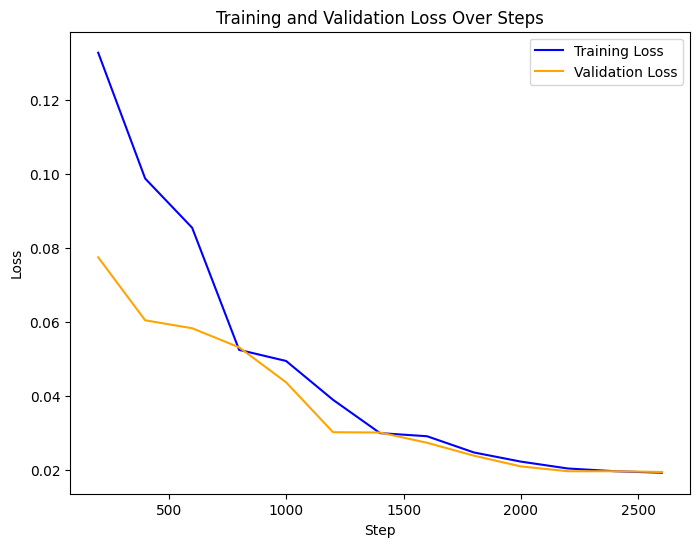

In [ ]:
# Nougat Iam2Latex dataset
import matplotlib.pyplot as plt

# Data
steps = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600]

training_loss = [0.132800, 0.098800, 0.085500, 0.052500, 0.049500, 0.039000, 0.030000, 0.029163, 0.024770, 0.022300, 0.020440, 0.019704, 0.019300]

validation_loss = [0.077514, 0.060484, 0.058343, 0.053183, 0.043733, 0.030249, 0.030161, 0.027400, 0.023900, 0.021002, 0.019700, 0.019700, 0.01950]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(steps, training_loss, color='blue', label='Training Loss')
plt.plot(steps, validation_loss, color='orange', label='Validation Loss')

# Customize the plot
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(False)  # Remove grid
plt.title('Training and Validation Loss Over Steps')

# Show the plot
plt.show()


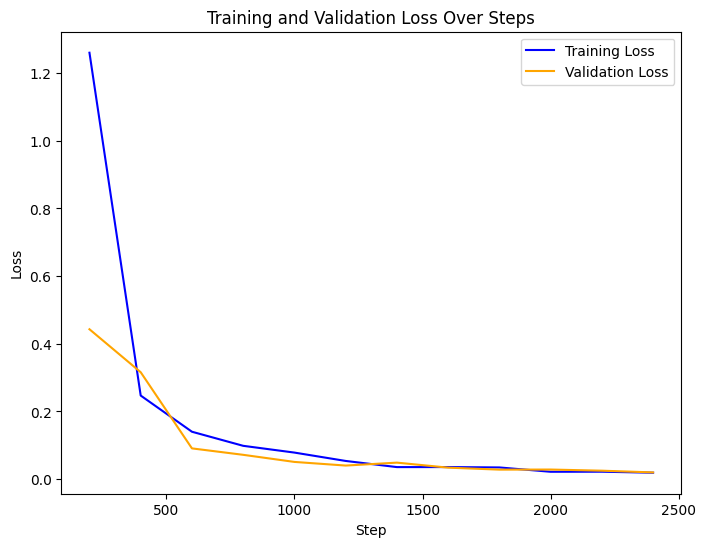

In [ ]:
# DONUT Iam2latex dataset
import matplotlib.pyplot as plt


steps = [ 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400]

training_loss = [ 1.26, 0.2471, 0.1402, 0.0986, 0.0786, 0.0539, 0.0357, 0.0358, 0.0347, 0.0219, 0.0221, 0.0191]

validation_loss = [ 0.443, 0.316, 0.091, 0.072, 0.05101, 0.04026, 0.0489, 0.0341, 0.02822, 0.0285, 0.0251, 0.0200]


# Plot
plt.figure(figsize=(8, 6))
plt.plot(steps, training_loss, color='blue', label='Training Loss')
plt.plot(steps, validation_loss, color='orange', label='Validation Loss')

# Customize the plot
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(False)  # Remove grid
plt.title('Training and Validation Loss Over Steps')

# Show the plot
plt.show()


In [ ]:
# import os
# import json
# import shutil
# import time

# # Define the source directory containing JSON files
# source_dir = r'E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex'  # Replace with your source folder path
# # Define the destination directory
# destination_dir = r'E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex\Jsons'  # Replace with your destination folder path

# def get_folder_name(length):
#     if length < 30:  # You can adjust this threshold as needed
#         return 'short_sequences'
#     else:
#         return 'long_sequences'

# # Create destination folders if they don't exist
# short_sequences_dir = os.path.join(destination_dir, 'short_sequences')
# long_sequences_dir = os.path.join(destination_dir, 'long_sequences')

# os.makedirs(short_sequences_dir, exist_ok=True)
# os.makedirs(long_sequences_dir, exist_ok=True)

# # Loop through each file in the source directory
# for filename in os.listdir(source_dir):
#     if filename.lower().endswith('.json'):
#         json_path = os.path.join(source_dir, filename)

#         # Read the JSON file
#         with open(json_path, 'r') as json_file:
#             try:
#                 # Load the JSON data
#                 data = json.load(json_file)

#                 # Ensure that 'uuid' is present and is a string
#                 uuid = data.get('uuid', '')

#                 # Calculate the sequence length
#                 seq_length = len(uuid)
#                 folder_name = get_folder_name(seq_length)

#                 # Attempt to move the JSON file to the respective folder
#                 moved = False
#                 attempts = 0
#                 while not moved and attempts < 3:  # Retry up to 3 times
#                     try:
#                         shutil.move(json_path, os.path.join(destination_dir, folder_name, filename))
#                         print(f'Moved: {filename} to {folder_name}')
#                         moved = True
#                     except PermissionError:  # Catch the specific error
#                         print(f'File {filename} is in use, retrying...')
#                         attempts += 1
#                         time.sleep(1)  # Wait for 1 second before retrying

#             except json.JSONDecodeError:
#                 print(f'Error decoding JSON from file: {filename}')
#             except Exception as e:
#                 print(f'An error occurred with file {filename}: {e}')

# print('JSON separation completed.')


File 000000.target.json is in use, retrying...
File 000000.target.json is in use, retrying...
File 000000.target.json is in use, retrying...
File 000001.target.json is in use, retrying...
File 000001.target.json is in use, retrying...
File 000001.target.json is in use, retrying...


KeyboardInterrupt: 